## Data Analysis
This section focuses on loading, exploring, and analyzing the dataset.

### Importing Libraries
We will load the necessary Python libraries for data analysis, visualization, and preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Setting File Path
Specify the path to the dataset stored locally in the project directory.

In [ ]:
data_file = '../data/POWER_Point_Daily_20000101_20241212_033d36N_006d88E_LST.csv'
df = pd.read_csv(data_file, skiprows=25)

### Dataset Header and Column Descriptions

The dataset, sourced from NASA/POWER CERES/MERRA-2, provides daily climate data for the location at **latitude 33.3614** and **longitude 6.8753**. Below is a table summarizing the variables:

| **Column**            | **Description**                                                  | **Units**      |
|------------------------|------------------------------------------------------------------|----------------|
| **YEAR, DOY**          | Year and day of the year.                                        | -              |
| **T2M_MAX, T2M_MIN**   | Maximum and minimum temperature at 2 meters.                    | °C             |
| **T2M**                | Average temperature at 2 meters.                                | °C             |
| **RH2M**               | Relative humidity at 2 meters.                                  | %              |
| **QV2M**               | Specific humidity at 2 meters.                                  | g/kg           |
| **PRECTOTCORR**        | Corrected daily precipitation.                                  | mm/day         |
| **CLRSKY_SFC_SW_DWN**  | Clear sky surface shortwave downward irradiance.                | MJ/m²/day      |
| **ALLSKY_SFC_SW_DWN**  | All sky surface shortwave downward irradiance.                  | MJ/m²/day      |
| **WS2M, WS2M_MAX**     | Average and maximum wind speed at 2 meters.                     | m/s            |
| **WS2M_MIN**           | Minimum wind speed at 2 meters.                                 | m/s            |
| **T2M_RANGE**          | Range of temperature at 2 meters.                               | °C             |
| **WS2M_RANGE**         | Range of wind speed at 2 meters.                                | m/s            |
| **GWETROOT**           | Root zone soil wetness.                                         | - (1)          |
| **GWETTOP**            | Surface soil wetness.                                           | - (1)          |
| **GWETPROF**           | Profile soil moisture.                                          | - (1)          |
| **T2MWET**             | Wet bulb temperature at 2 meters.                               | °C             |

**Note**: Missing or uncomputable values are represented as `-999`.

In [ ]:
with open(data_file, 'r') as file:
    for _ in range(40):
        print(file.readline())

-BEGIN HEADER-

NASA/POWER CERES/MERRA2 Native Resolution Daily Data 

Dates (month/day/year): 01/01/2000 through 12/12/2024 

Location: Latitude  33.3614   Longitude 6.8753 

Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 62.57 meters

The value for missing source data that cannot be computed or is outside of the sources availability range: -999 

Parameter(s): 

T2M_MAX               MERRA-2 Temperature at 2 Meters Maximum (C) 

T2M_MIN               MERRA-2 Temperature at 2 Meters Minimum (C) 

T2M                   MERRA-2 Temperature at 2 Meters (C) 

RH2M                  MERRA-2 Relative Humidity at 2 Meters (%) 

QV2M                  MERRA-2 Specific Humidity at 2 Meters (g/kg) 

PRECTOTCORR           MERRA-2 Precipitation Corrected (mm/day) 

CLRSKY_SFC_SW_DWN     CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (MJ/m^2/day) 

ALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (MJ/m^2/day) 

WS2M            

#### Previewing the Dataset
Display the first few rows of the loaded dataset to understand its structure.

In [ ]:
df

,YEAR,DOY,T2M_MAX,T2M_MIN,T2M,RH2M,QV2M,PRECTOTCORR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS2M,WS2M_MAX,WS2M_MIN,T2M_RANGE,WS2M_RANGE,GWETROOT,GWETTOP,GWETPROF,T2MWET
0,2000,1,12.80,2.44,7.61,57.62,3.60,0.01,11.80,11.05,1.23,2.62,0.41,10.35,2.22,0.16,0.19,0.17,3.51
1,2000,2,12.84,2.36,7.64,64.75,4.03,0.00,11.46,11.35,1.19,2.23,0.21,10.48,2.02,0.15,0.18,0.17,4.34
2,2000,3,13.55,2.19,7.74,67.12,4.21,0.01,11.28,10.43,1.32,2.10,0.34,11.36,1.77,0.15,0.18,0.17,4.71
3,2000,4,12.88,2.43,8.07,63.06,4.03,0.00,11.52,11.40,1.23,2.66,0.18,10.45,2.48,0.15,0.18,0.17,4.49
4,2000,5,12.86,1.40,6.58,65.00,3.72,0.00,11.31,11.22,1.52,2.31,0.80,11.45,1.51,0.15,0.18,0.17,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,2024,179,46.54,27.76,37.56,17.00,6.16,0.00,27.77,26.81,3.91,6.11,0.71,18.78,5.40,0.11,0.08,0.12,22.13
8945,2024,180,48.94,31.88,39.81,10.94,4.64,0.00,28.29,21.83,2.21,3.45,1.13,17.05,2.31,0.11,0.07,0.12,21.39
8946,2024,181,45.87,28.15,36.98,22.56,7.75,0.00,29.23,28.51,3.34,5.47,1.55,17.73,3.92,0.11,0.07,0.12,23.25
8947,2024,182,46.61,28.50,37.63,16.31,5.98,0.00,28.78,28.42,3.48,5.36,0.91,18.11,4.45,0.11,0.07,0.12,21.96


In [ ]:
df.head()

,YEAR,DOY,T2M_MAX,T2M_MIN,T2M,RH2M,QV2M,PRECTOTCORR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS2M,WS2M_MAX,WS2M_MIN,T2M_RANGE,WS2M_RANGE,GWETROOT,GWETTOP,GWETPROF,T2MWET
0,2000,1,12.80,2.44,7.61,57.62,3.60,0.01,11.80,11.05,1.23,2.62,0.41,10.35,2.22,0.16,0.19,0.17,3.51
1,2000,2,12.84,2.36,7.64,64.75,4.03,0.00,11.46,11.35,1.19,2.23,0.21,10.48,2.02,0.15,0.18,0.17,4.34
2,2000,3,13.55,2.19,7.74,67.12,4.21,0.01,11.28,10.43,1.32,2.10,0.34,11.36,1.77,0.15,0.18,0.17,4.71
3,2000,4,12.88,2.43,8.07,63.06,4.03,0.00,11.52,11.40,1.23,2.66,0.18,10.45,2.48,0.15,0.18,0.17,4.49
4,2000,5,12.86,1.40,6.58,65.00,3.72,0.00,11.31,11.22,1.52,2.31,0.80,11.45,1.51,0.15,0.18,0.17,3.26


#### Descriptive Statistics
Generate summary statistics for the dataset to understand its distribution and key metrics.

In [ ]:
df.describe()

,YEAR,DOY,T2M_MAX,T2M_MIN,T2M,RH2M,QV2M,PRECTOTCORR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS2M,WS2M_MAX,WS2M_MIN,T2M_RANGE,WS2M_RANGE,GWETROOT,GWETTOP,GWETPROF,T2MWET
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,2011.754609,181.261817,28.337770,15.604113,21.738119,41.655788,6.148659,0.214934,21.386114,20.138484,3.035757,5.031286,1.266076,12.733617,3.765117,0.125615,0.122893,0.139445,13.868798
std,7.076259,105.425851,9.301278,8.175070,8.893992,15.656690,2.125888,1.523425,6.184522,6.415579,1.398690,1.965559,0.954224,2.591678,1.560454,0.019434,0.042210,0.024337,6.273208
min,2000.000000,1.000000,7.480000,-2.380000,3.080000,7.810000,1.770000,0.000000,7.830000,1.970000,0.620000,0.920000,0.010000,1.770000,0.600000,0.100000,0.050000,0.100000,-2.130000
25%,2006.000000,90.000000,19.760000,8.170000,13.480000,29.690000,4.520000,0.000000,15.380000,14.260000,1.990000,3.550000,0.640000,11.050000,2.620000,0.110000,0.090000,0.120000,8.350000
50%,2012.000000,179.000000,28.190000,15.550000,21.800000,40.380000,5.800000,0.000000,21.930000,20.440000,2.770000,4.850000,1.100000,12.620000,3.580000,0.120000,0.120000,0.130000,14.110000
75%,2018.000000,273.000000,36.510000,23.090000,29.770000,53.190000,7.570000,0.000000,27.260000,26.330000,3.800000,6.270000,1.550000,14.450000,4.720000,0.130000,0.140000,0.160000,19.650000
max,2024.000000,366.000000,49.940000,35.580000,40.940000,92.120000,13.730000,55.670000,32.010000,31.540000,10.350000,14.110000,7.910000,22.590000,12.060000,0.310000,0.450000,0.250000,26.420000


### Visualizing Data
Create line plots to visualize trends in specific variables over time.

In [ ]:
def plot_columns_together(df, columns, figsize=(12, 8), n_cols=2):
    """
    Plots multiple columns from the DataFrame in a single figure with subplots,
    including titles for each column and proper indexing.

    Parameters:
        df (DataFrame): The dataset.
        columns (list): List of column names to plot.
        figsize (tuple): Overall size of the figure. Default is (12, 8).
        n_cols (int): Number of columns in the subplot grid. Default is 2.
    """
    # Validate columns
    valid_columns = [col for col in columns if col in df.columns]
    invalid_columns = [col for col in columns if col not in df.columns]

    if invalid_columns:
        print(f"Warning: The following columns were not found and will be skipped: {invalid_columns}")

    n_plots = len(valid_columns)
    n_rows = -(-n_plots // n_cols)  # Calculate rows needed (ceiling division)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of multi-dimensional axes

    # Plot each valid column
    for i, column in enumerate(valid_columns):
        axes[i].plot(df[column], label=column)
        axes[i].set_title(column)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].legend()

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add overall figure title
    fig.suptitle("Column Plots", fontsize=16)
    plt.show()

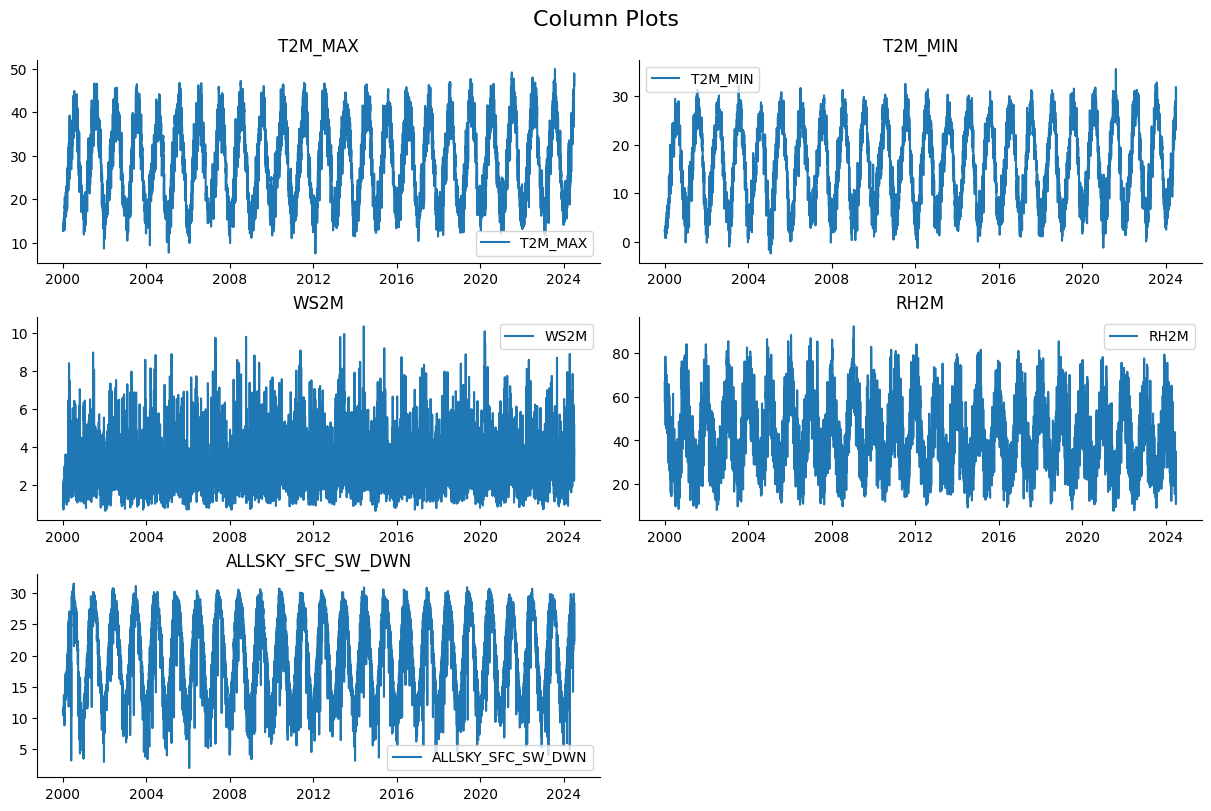

In [ ]:
# Example usage
columns_to_plot = ["T2M_MAX","T2M_MIN","WS2M","RH2M","ALLSKY_SFC_SW_DWN"]

# Generate and display plots
plot_columns_together(df, columns_to_plot)

In [ ]:
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')
df.set_index('date', inplace=True)

## Generating Additional Columns

### Generating ETo

The `eto` library in Python calculates **ETo (evapotranspiration)** using the **FAO Penman-Monteith equation**. It is used to estimate evaporation and transpiration based on weather data. The equation is:

$$
ETo = \frac{0.408 \Delta (R_n - G) + \gamma \frac{900}{T + 273} u_2 (e_s - e_a)}{\Delta + \gamma \left(1 + 0.34 u_2\right)}
$$

Where:

- **ETo** = reference evapotranspiration (mm/day)
- **Δ** = slope of the saturation vapor pressure curve (kPa/°C)
- **Rₙ** = net radiation (MJ/m²/day)
- **G** = soil heat flux density (MJ/m²/day)
- **γ** = psychrometric constant (kPa/°C)
- **T** = mean air temperature (°C)
- **u₂** = wind speed at 2 meters (m/s)
- **eₛ** = saturation vapor pressure (kPa)
- **eₐ** = actual vapor pressure (kPa)

In [ ]:
!pip install eto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from eto import ETo

def calculate_eto(df, z_msl, lat, lon, TZ_lon, freq='D'):
    """
    Calculate ETo and add it as a new column to the dataframe.

    Parameters:
    - df: The dataframe containing the meteorological data.
    - z_msl: Altitude in meters.
    - lat: Latitude of the location.
    - lon: Longitude of the location.
    - TZ_lon: Timezone longitude.
    - freq: Frequency of the data (default is 'D' for daily).

    Returns:
    - df: DataFrame with the new 'ETo' column.
    """
    # Create a date column and set it as index
    df['date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')
    df.set_index('date', inplace=True)

    # Map the columns to the expected names for ETo calculation
    df_mapped = df.rename(columns={
        'T2M_MAX': 'T_max',
        'T2M_MIN': 'T_min',
        'T2M': 'T',
        'RH2M': 'RH',
        'ALLSKY_SFC_SW_DWN': 'R_s'
    })

    # Initialize the ETo class
    et1 = ETo()

    # Estimate parameters
    et1.param_est(df_mapped, freq, z_msl, lat, lon, TZ_lon)

    # Calculate ETo using FAO method
    eto1 = et1.eto_fao()

    # Add ETo values to the original dataframe (without renaming the columns)
    df['ETo'] = eto1

    return df

In [ ]:
# Coordinates for El Oued, Algeria
z_msl = 75    # Altitude in meters (approximate)
lat = 33.3614  # Latitude of El Oued
lon = 6.8753  # Longitude of El Oued
TZ_lon = 6    # Time zone longitude for El Oued (UTC+1)

df_eto = calculate_eto(df, z_msl, lat, lon, TZ_lon)
df_eto

,YEAR,DOY,T2M_MAX,T2M_MIN,T2M,RH2M,QV2M,PRECTOTCORR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS2M,WS2M_MAX,WS2M_MIN,T2M_RANGE,WS2M_RANGE,GWETROOT,GWETTOP,GWETPROF,T2MWET,ETo
date,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000,1,12.80,2.44,7.61,57.62,3.60,0.01,11.80,11.05,1.23,2.62,0.41,10.35,2.22,0.16,0.19,0.17,3.51,1.42
2000-01-02,2000,2,12.84,2.36,7.64,64.75,4.03,0.00,11.46,11.35,1.19,2.23,0.21,10.48,2.02,0.15,0.18,0.17,4.34,1.43
2000-01-03,2000,3,13.55,2.19,7.74,67.12,4.21,0.01,11.28,10.43,1.32,2.10,0.34,11.36,1.77,0.15,0.18,0.17,4.71,1.51
2000-01-04,2000,4,12.88,2.43,8.07,63.06,4.03,0.00,11.52,11.40,1.23,2.66,0.18,10.45,2.48,0.15,0.18,0.17,4.49,1.44
2000-01-05,2000,5,12.86,1.40,6.58,65.00,3.72,0.00,11.31,11.22,1.52,2.31,0.80,11.45,1.51,0.15,0.18,0.17,3.26,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,2024,179,46.54,27.76,37.56,17.00,6.16,0.00,27.77,26.81,3.91,6.11,0.71,18.78,5.40,0.11,0.08,0.12,22.13,8.37
2024-06-28,2024,180,48.94,31.88,39.81,10.94,4.64,0.00,28.29,21.83,2.21,3.45,1.13,17.05,2.31,0.11,0.07,0.12,21.39,7.64
2024-06-29,2024,181,45.87,28.15,36.98,22.56,7.75,0.00,29.23,28.51,3.34,5.47,1.55,17.73,3.92,0.11,0.07,0.12,23.25,8.56


In [ ]:
df_eto.describe()["ETo"]

,ETo
count,8949.000000
mean,4.367638
std,2.111909
min,0.640000
25%,2.310000
50%,4.190000
75%,6.300000
max,9.200000


### Generating Additional Agriculture Parameters Using DSSAT


In [ ]:
!pip install DSSATTools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 78.0 MB/s eta 0:00:00
  Created wheel for fortranformat: filename=fortranformat-2.0.0-py3-none-any.whl size=24536 sha256=802a99dde0e2ffd266c1d9840e9888b2db5635ccc7afec2f42ff447e4a929c4d
  Stored in directory: /root/.cache/pip/wheels/02/ca/38/f24153dd3ad835514c1cc3fc1d95e461fd120c7d6d308942a8
Successfully built fortranformat


In [ ]:
from DSSATTools import (Crop, SoilProfile, Weather, Management, DSSAT, TabularSubsection,SoilLayer,available_cultivars)
import DSSATTools

##### Create a WeatherData instance
To perform a simulation we need to provide for different elements: Weather, Crop, Soil and Managment. All those elements play an important role in the soil-plant-atmosphere system. This library provides four classes to define those four elements. The first element to be defined in this tutorial is the weather. The Weather class provides an interface to define the weather data that will be used by DSSAT. Regardless of the data source (surface stations, weather generators, reanalysis models, etc.) you must provide the data as a pandas DataFrame, the details of the station (Longitude, latitude, elevation) and a dict mapping each DataFrame column to a required DSSAT weather Variable.

In [ ]:
DSSATTools.weather.list_weather_variables()

DATE: Date, year + days from Jan. 1
SRAD: Daily solar radiation, MJ m-2 day-1
TMAX: Daily temperature maximum, C
TMIN: Daily temperature minimum, C
RAIN: Daily rainfall (incl. snow), mm day-1
DEWP: Daily dewpoint temperature average, C
WIND: Daily wind speed (km d-1)
PAR: Daily photosynthetic radiation, moles m-2 day-1
EVAP: Daily pan evaporation (mm d-1)
RHUM: Relative humidity average, %


In [ ]:
# Coordinates for El Oued, Algeria
z_msl = 75    # Altitude in meters (approximate)
lat = 33.3678 # Latitude of El Oued
lon = 6.8517  # Longitude of El Oued
TZ_lon = 6    # Time zone longitude for El Oued (UTC+1)

# Create a WeatherStation instance
wth = Weather(df,{'T2M_MIN': 'TMIN', 'T2M_MAX': 'TMAX', 'PRECTOTCORR': 'RAIN','CLRSKY_SFC_SW_DWN': 'SRAD', 'RH2M': 'RHUM'},lat,lon,z_msl)

In [ ]:
wth

Weather data at 6.852°, 33.368°
  Date start: 2000-01-01
  Date end: 2024-07-01
Average values:
TMIN    15.604113
TMAX    28.337770
RAIN     0.214934
SRAD    21.386114
RHUM    41.655788
dtype: float64

#### Create a SoilProfile

In DSSAT, You can use a default soil profile, or you can create your own soil profile if you have enough data about the soil layers.

The available soil Profiles are :




* Sand=S;
* Loamy Sand=LS;
* Sandy Loam=SL;
* Loam=L;
* Silty Loam=SIL;
* Silt=SI;
* Sandy Clay Loam=SCL;
* Clay Loam=CL;
* Silty Clay Loam=SICL;
* Sandy Clay=SC;
* Silty Clay=SIC;
* Clay=C

In [ ]:
soil = SoilProfile(default_class='LS')


In [ ]:
print(soil)

*IBMZ910023  IBSNAT      -99     151 Norfolk Loamy Sand
@SITE        COUNTRY          LAT     LONG SCS FAMILY
 Florence,SC USA            -0.099   -0.099 Norfolk Loamy Sand                  
@ SCOM  SALB  SLU1  SLDR  SLRO  SLNF  SLPF  SMHB  SMPX  SMKE
   -99  0.14   5.0  0.60  60.0  1.00  1.00 IB001 IB001 IB001
@  SLB  SLMH  SLLL  SDUL  SSAT  SRGF  SSKS  SBDM  SLOC  SLCL  SLSI  SLCF  SLNI  SLHW  SLHB  SCEC  SADC
    10   -99 0.075 0.210 0.250 1.000   -99  1.55  0.30   -99   -99   -99   -99   -99   -99   -99   -99
    20   -99 0.075 0.210 0.250 1.000   -99  1.55  0.30   -99   -99   -99   -99   -99   -99   -99   -99
    41   -99 0.100 0.240 0.290 0.800   -99  1.67  0.17   -99   -99   -99   -99   -99   -99   -99   -99
    71   -99 0.210 0.310 0.350 0.400   -99  1.54  0.01   -99   -99   -99   -99   -99   -99   -99   -99
   101   -99 0.210 0.320 0.360 0.100   -99  1.54  0.01   -99   -99   -99   -99   -99   -99   -99   -99
   126   -99 0.180 0.280 0.320 0.100   -99  1.68  0.01   -99   -99   

##### Create a Crop object from default crops

In [ ]:
crop = Crop('tomato',"TM0001")

##### Create a management instance


In [ ]:
from datetime import datetime
year = 2000

man = Management(
            sim_start=datetime(year, 4, 14),
            planting_date=datetime(year, 4, 15),
            emergence_date=datetime(year, 4, 20),
            initial_swc=0,
            irrigation="A",      # automatic
            harvest="M",         # maturing
            fertilization="R",   # On reported dates
            organic_matter="G"   # Ceres (Godiwn) (indicating the use of organic fertilizers)
)

# Define planting details
man.planting_details["PPOP"] = 2  # Plant population at seeding (plants per m2)
man.planting_details["PPOE"] = 1.8  # Plant population at emergence (plants per m2)
man.planting_details["PLME"] = 'S'  # Semi-direct
man.planting_details["PLDS"] = 'R'  # Planting distribution: Row planting ('R')
man.planting_details["PLRS"] = 70  # Row spacing (cm)
man.planting_details["PLRD"] = 0  # Row direction (degrees from North)
man.planting_details["PLDP"] = 5  # Planting depth (cm)
man.planting_details["PLWT"] = 500  # Planting material dry weight (kg/ha)
man.planting_details["PAGE"] = 30  # Transplant age (days, if applicable)
man.planting_details["PENV"] = 25  # Transplant environment temperature (°C)

# Set up and run DSSAT for the year
dssat = DSSAT()
dssat.setup()
dssat.run(soil, wth, crop, man)

# Extract moisture data from DSSAT outputs
moisture = dssat.output["SoilWat"]
dssat.output

/tmp/dssatyjxgljvo created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  37 118  1579    57    16   131   206    82     0   -99      0   17


{'PlantGro':            @YEAR  DOY  DAS  DAP  L#SD  GSTD   LAID  LWAD  SWAD  GWAD  ...  \
 2000-04-15  2000  106    2    0   0.0     0  0.000     0     0     0  ...   
 2000-04-16  2000  107    3    1   0.0     0  0.000     0     0     0  ...   
 2000-04-17  2000  108    4    2   0.0     0  0.000     0     0     0  ...   
 2000-04-18  2000  109    5    3   0.0     0  0.000     0     0     0  ...   
 2000-04-19  2000  110    6    4   0.0     0  0.000     0     0     0  ...   
 ...          ...  ...  ...  ...   ...   ...    ...   ...   ...   ...  ...   
 2000-08-07  2000  220  116  114  13.0     5  0.869   444   832     2  ...   
 2000-08-08  2000  221  117  115  13.0     5  0.907   463   874     2  ...   
 2000-08-09  2000  222  118  116  13.0     5  0.945   481   915     2  ...   
 2000-08-10  2000  223  119  117  13.0     5  0.983   500   956     3  ...   
 2000-08-11  2000  224  120  118  13.0     8  1.023   520  1002     3  ...   
 
             RL3D  RL4D  RL5D  RL6D  RL7D  RL8D  R

In [ ]:
growth = dssat.output["PlantGro"]
moisture = dssat.output["SoilWat"]

In [ ]:
growth.head()

,@YEAR,DOY,DAS,DAP,L#SD,GSTD,LAID,LWAD,SWAD,GWAD,...,RL3D,RL4D,RL5D,RL6D,RL7D,RL8D,RL9D,RL10D,SNW0C,SNW1C
2000-04-15,2000,106,2,0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2000-04-16,2000,107,3,1,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2000-04-17,2000,108,4,2,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2000-04-18,2000,109,5,3,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2000-04-19,2000,110,6,4,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
moisture.describe()

,DAS,SWTD,SWXD,ROFC,DRNC,PREC,IR#C,IRRC,LATFC,DTWT,...,SW1D,SW2D,SW3D,SW4D,SW5D,SW6D,SW7D,SW8D,SW9D,SW10D
count,121.000000,121.000000,121.000000,121.0,121.0,121.000000,121.000000,121.000000,121.0,121.0,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.000000,121.000000,121.000000,121.000000
mean,60.000000,374.876033,122.876033,0.0,0.0,10.925620,1.115702,28.884298,0.0,151.0,...,0.109843,0.176901,0.187116,0.205463,0.185314,0.23214,0.286504,0.291917,0.271661,0.272661
std,35.073732,13.595079,13.595079,0.0,0.0,7.027524,1.512118,39.255613,0.0,0.0,...,0.048747,0.018052,0.015276,0.016689,0.021691,0.00677,0.014675,0.008622,0.010673,0.009989
min,0.000000,334.000000,82.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,151.0,...,0.040000,0.132000,0.139000,0.181000,0.135000,0.21700,0.253000,0.271000,0.243000,0.245000
25%,30.000000,369.000000,117.000000,0.0,0.0,4.000000,0.000000,0.000000,0.0,151.0,...,0.070000,0.165000,0.178000,0.194000,0.180000,0.22700,0.276000,0.286000,0.267000,0.269000
50%,60.000000,380.000000,128.000000,0.0,0.0,16.000000,0.000000,0.000000,0.0,151.0,...,0.099000,0.175000,0.190000,0.199000,0.193000,0.23400,0.294000,0.296000,0.277000,0.278000
75%,90.000000,383.000000,131.000000,0.0,0.0,16.000000,2.000000,51.000000,0.0,151.0,...,0.144000,0.190000,0.197000,0.220000,0.199000,0.23900,0.299000,0.299000,0.280000,0.280000
max,120.000000,398.000000,146.000000,0.0,0.0,16.000000,5.000000,131.000000,0.0,151.0,...,0.218000,0.225000,0.225000,0.246000,0.212000,0.24000,0.300000,0.300000,0.280000,0.280000


In [ ]:
from datetime import datetime

def generate_management_instances_over_years(begin,end):
  if begin > end:
    raise ValueError("Begin year cannot be greater than end year.")

  management_instances_over_years = []

  for year in range(begin, end):

    man = Management(
                sim_start=datetime(year, 4, 14),
                planting_date=datetime(year, 4, 15),
                emergence_date=datetime(year, 4, 20),
                initial_swc=0,
                irrigation="A",      # automatic
                harvest="M",         # maturing
                fertilization="R",   # On reported dates
                organic_matter="G"   # Ceres (Godiwn) (indicating the use of organic fertilizers)
    )

    # Define planting details
    man.planting_details["PPOP"] = 2  # Plant population at seeding (plants per m2)
    man.planting_details["PPOE"] = 1.8  # Plant population at emergence (plants per m2)
    man.planting_details["PLME"] = 'S'  # Semi-direct
    man.planting_details["PLDS"] = 'R'  # Planting distribution: Row planting ('R')
    man.planting_details["PLRS"] = 70  # Row spacing (cm)
    man.planting_details["PLRD"] = 0  # Row direction (degrees from North)
    man.planting_details["PLDP"] = 5  # Planting depth (cm)
    man.planting_details["PLWT"] = 500  # Planting material dry weight (kg/ha)
    man.planting_details["PAGE"] = 30  # Transplant age (days, if applicable)
    man.planting_details["PENV"] = 25  # Transplant environment temperature (°C)
    management_instances_over_years.append(man)

  return management_instances_over_years

In [ ]:
management_instances_over_years = generate_management_instances_over_years(begin=2000,end=2024)

## Generating the Data1 to train LSTM 1

In [ ]:
from datetime import datetime
import pandas as pd

def generate_data1(df,soil,wth,crop,management_instances_over_years):
    all_years_data = []  # List to collect DataFrames for each year

    for man in management_instances_over_years:
        dssat = DSSAT()
        dssat.setup()
        dssat.run(soil, wth, crop, man)
        # Extract moisture data from DSSAT outputs
        moisture = dssat.output["SoilWat"]

        # Merge with ETo data for the year
        output_data = pd.merge(df_eto, moisture, left_index=True, right_index=True)
        output_data = output_data[[
            "T2M_MAX",
            "T2M_MIN",
            "WS2M",
            "RH2M",
            "ALLSKY_SFC_SW_DWN",
            "ETo",
            "SW1D",
            "SW2D",
            "SW3D",
            "SWTD",
            "IRRC"
        ]]

        # Append the DataFrame to the list
        all_years_data.append(output_data)
        dssat.close()

    combined_data = pd.concat(all_years_data)
    return combined_data

# Call the function and store the result
output_data_df1 = generate_data1(df_eto,soil,wth,crop,management_instances_over_years)

/tmp/dssatmjoolyxw created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  37 118  1579    57    16   131   206    82     0   -99      0   17
/tmp/dssatmjoolyxw and its content has been removed.
/tmp/dssatlgeuosnp created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  38 126   824    10     7   130   175   103     0   -99      0   17
/tmp/dssatlgeuosnp and its content has been removed.
/tmp/dssatxhhkcexn created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  39 124  1131    23    20   132   203    89     0   -99      0   17
/tmp/dssatxhhkcexn and its content has been removed.
/tmp/dssatnnvbqulu created.

RUN    TRT FLO

In [ ]:
output_data_df1.describe()

,T2M_MAX,T2M_MIN,WS2M,RH2M,ALLSKY_SFC_SW_DWN,ETo,SW1D,SW2D,SW3D,SWTD,IRRC
count,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000
mean,36.297894,22.159843,3.489393,29.918590,26.562145,6.547557,0.103208,0.177114,0.188655,375.990489,31.301738
std,5.798891,4.992890,1.391972,10.056056,3.133160,1.145731,0.053030,0.019459,0.015866,15.311601,43.083277
min,17.850000,7.830000,0.840000,7.810000,3.180000,1.440000,0.024000,0.124000,0.128000,322.000000,0.000000
25%,32.230000,18.400000,2.500000,22.750000,25.800000,5.790000,0.057000,0.163000,0.182000,370.000000,0.000000
50%,36.970000,22.870000,3.240000,29.690000,27.330000,6.690000,0.097000,0.178000,0.191000,380.000000,26.000000
75%,40.650000,26.160000,4.220000,36.250000,28.480000,7.370000,0.142000,0.192000,0.198000,386.000000,51.000000
max,49.940000,35.580000,10.350000,85.190000,31.540000,9.200000,0.219000,0.225000,0.226000,431.000000,215.000000


In [ ]:
output_data_df1.to_csv('../data/output_data1.csv', index_label='date')

Plotting Columns

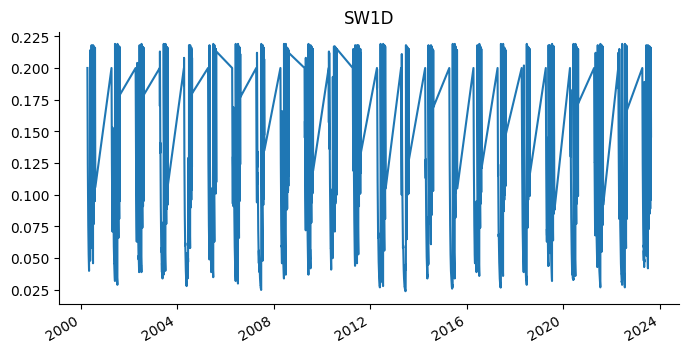

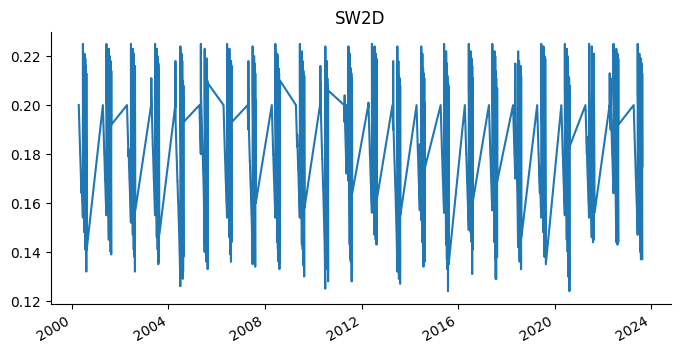

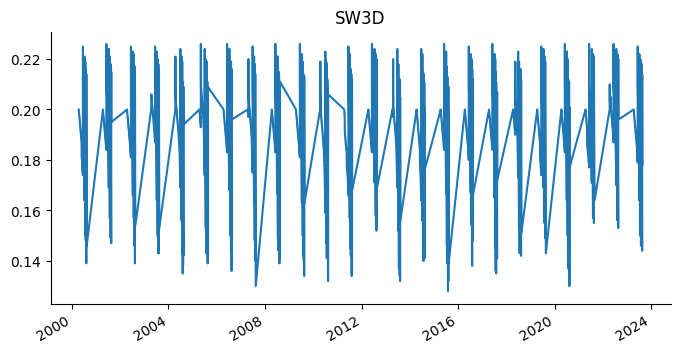

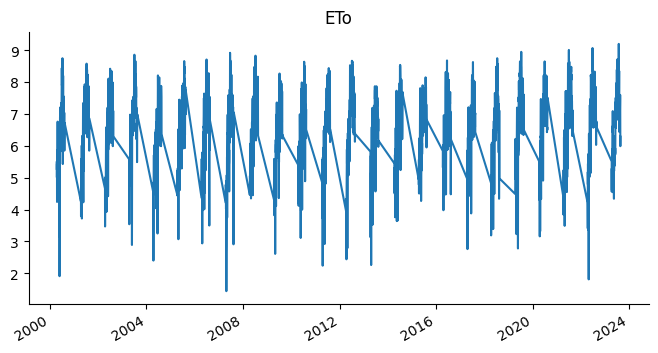

In [ ]:
columns_to_plot = ["SWTD","ETo"]
plot_columns_together(output_data_df1, columns_to_plot)

# Generating Data2 to train LSTM2

In [ ]:
from datetime import datetime
import pandas as pd

def generate_data2(df,soil,wth,crop,management_instances_over_years):
    all_years_data = []  # List to collect DataFrames for each year

    for man in management_instances_over_years:
        # Set up and run DSSAT for the year
        dssat = DSSAT()
        dssat.setup()
        dssat.run(soil, wth, crop, man)

        # Extract moisture data from DSSAT outputs
        moisture = dssat.output["SoilWat"]
        plant = dssat.output["PlantGro"]

        # Merge with ETo data for the year
        output_data = pd.merge(df_eto, moisture, left_index=True, right_index=True)
        output_data = pd.merge(output_data, plant, left_index=True, right_index=True)

        output_data = output_data[[
            "SWTD",
            "SWXD",
            "LAID",
            "HIAD",
            "WSPD",
            "WSGD",
            "NSTD",

            "T2M",
            "PREC",
            "IRRC",
            "HIAD",
            "CWAD",



            "T2M_MAX",
            "T2M_MIN",
            "WS2M",
            "RH2M",
            "ALLSKY_SFC_SW_DWN",
            "ETo",
            "SW1D",
            "SW2D",
            "SW3D",
        ]]


        # Append the DataFrame to the list
        all_years_data.append(output_data)
        dssat.close()

    # Combine all years' data into a single DataFrame
    combined_data = pd.concat(all_years_data)
      # Process date column
    return combined_data

# Call the function and store the result
output_data_df2 = generate_data2(df_eto,soil,wth,crop,management_instances_over_years)

/tmp/dssatrljwsbiq created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  37 118  1579    57    16   131   206    82     0   -99      0   17
/tmp/dssatrljwsbiq and its content has been removed.
/tmp/dssatjlbktaoh created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  38 126   824    10     7   130   175   103     0   -99      0   17
/tmp/dssatjlbktaoh and its content has been removed.
/tmp/dssatqomuxjfq created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 TM   1  39 124  1131    23    20   132   203    89     0   -99      0   17
/tmp/dssatqomuxjfq and its content has been removed.
/tmp/dssatglkebogp created.

RUN    TRT FLO

In [ ]:
output_data_df2.describe()

,SWTD,SWXD,LAID,HIAD,WSPD,WSGD,NSTD,T2M,PREC,IRRC,...,CWAD,T2M_MAX,T2M_MIN,WS2M,RH2M,ALLSKY_SFC_SW_DWN,ETo,SW1D,SW2D,SW3D
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,...,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,375.726425,123.726425,0.171508,0.000287,0.000010,0.040474,0.003365,29.477064,14.539154,31.802399,...,221.965345,36.445788,22.305665,3.485941,29.786311,26.593392,6.575838,0.101786,0.176756,0.188473
std,15.289260,15.289260,0.267035,0.000493,0.000529,0.070238,0.025647,5.171551,14.172716,43.242802,...,376.999790,5.707112,4.885845,1.382534,10.024213,3.128095,1.129905,0.052227,0.019405,0.015927
min,322.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.060000,0.000000,0.000000,...,0.000000,17.850000,7.830000,0.840000,7.810000,3.180000,1.440000,0.024000,0.124000,0.128000
25%,369.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.590000,4.000000,0.000000,...,0.000000,32.460000,18.620000,2.500000,22.690000,25.850000,5.840000,0.056000,0.163000,0.181000
50%,379.000000,127.000000,0.026000,0.000000,0.000000,0.000000,0.000000,30.300000,11.000000,26.000000,...,21.000000,37.060000,23.050000,3.240000,29.560000,27.360000,6.710000,0.095000,0.177000,0.191000
75%,385.000000,133.000000,0.248000,0.001000,0.000000,0.063000,0.000000,33.530000,20.000000,51.000000,...,283.000000,40.720000,26.210000,4.220000,36.060000,28.500000,7.380000,0.139000,0.191000,0.198000
max,431.000000,179.000000,1.410000,0.002000,0.029000,0.353000,0.283000,40.940000,74.000000,215.000000,...,2167.000000,49.940000,35.580000,10.350000,85.190000,31.540000,9.200000,0.219000,0.225000,0.226000


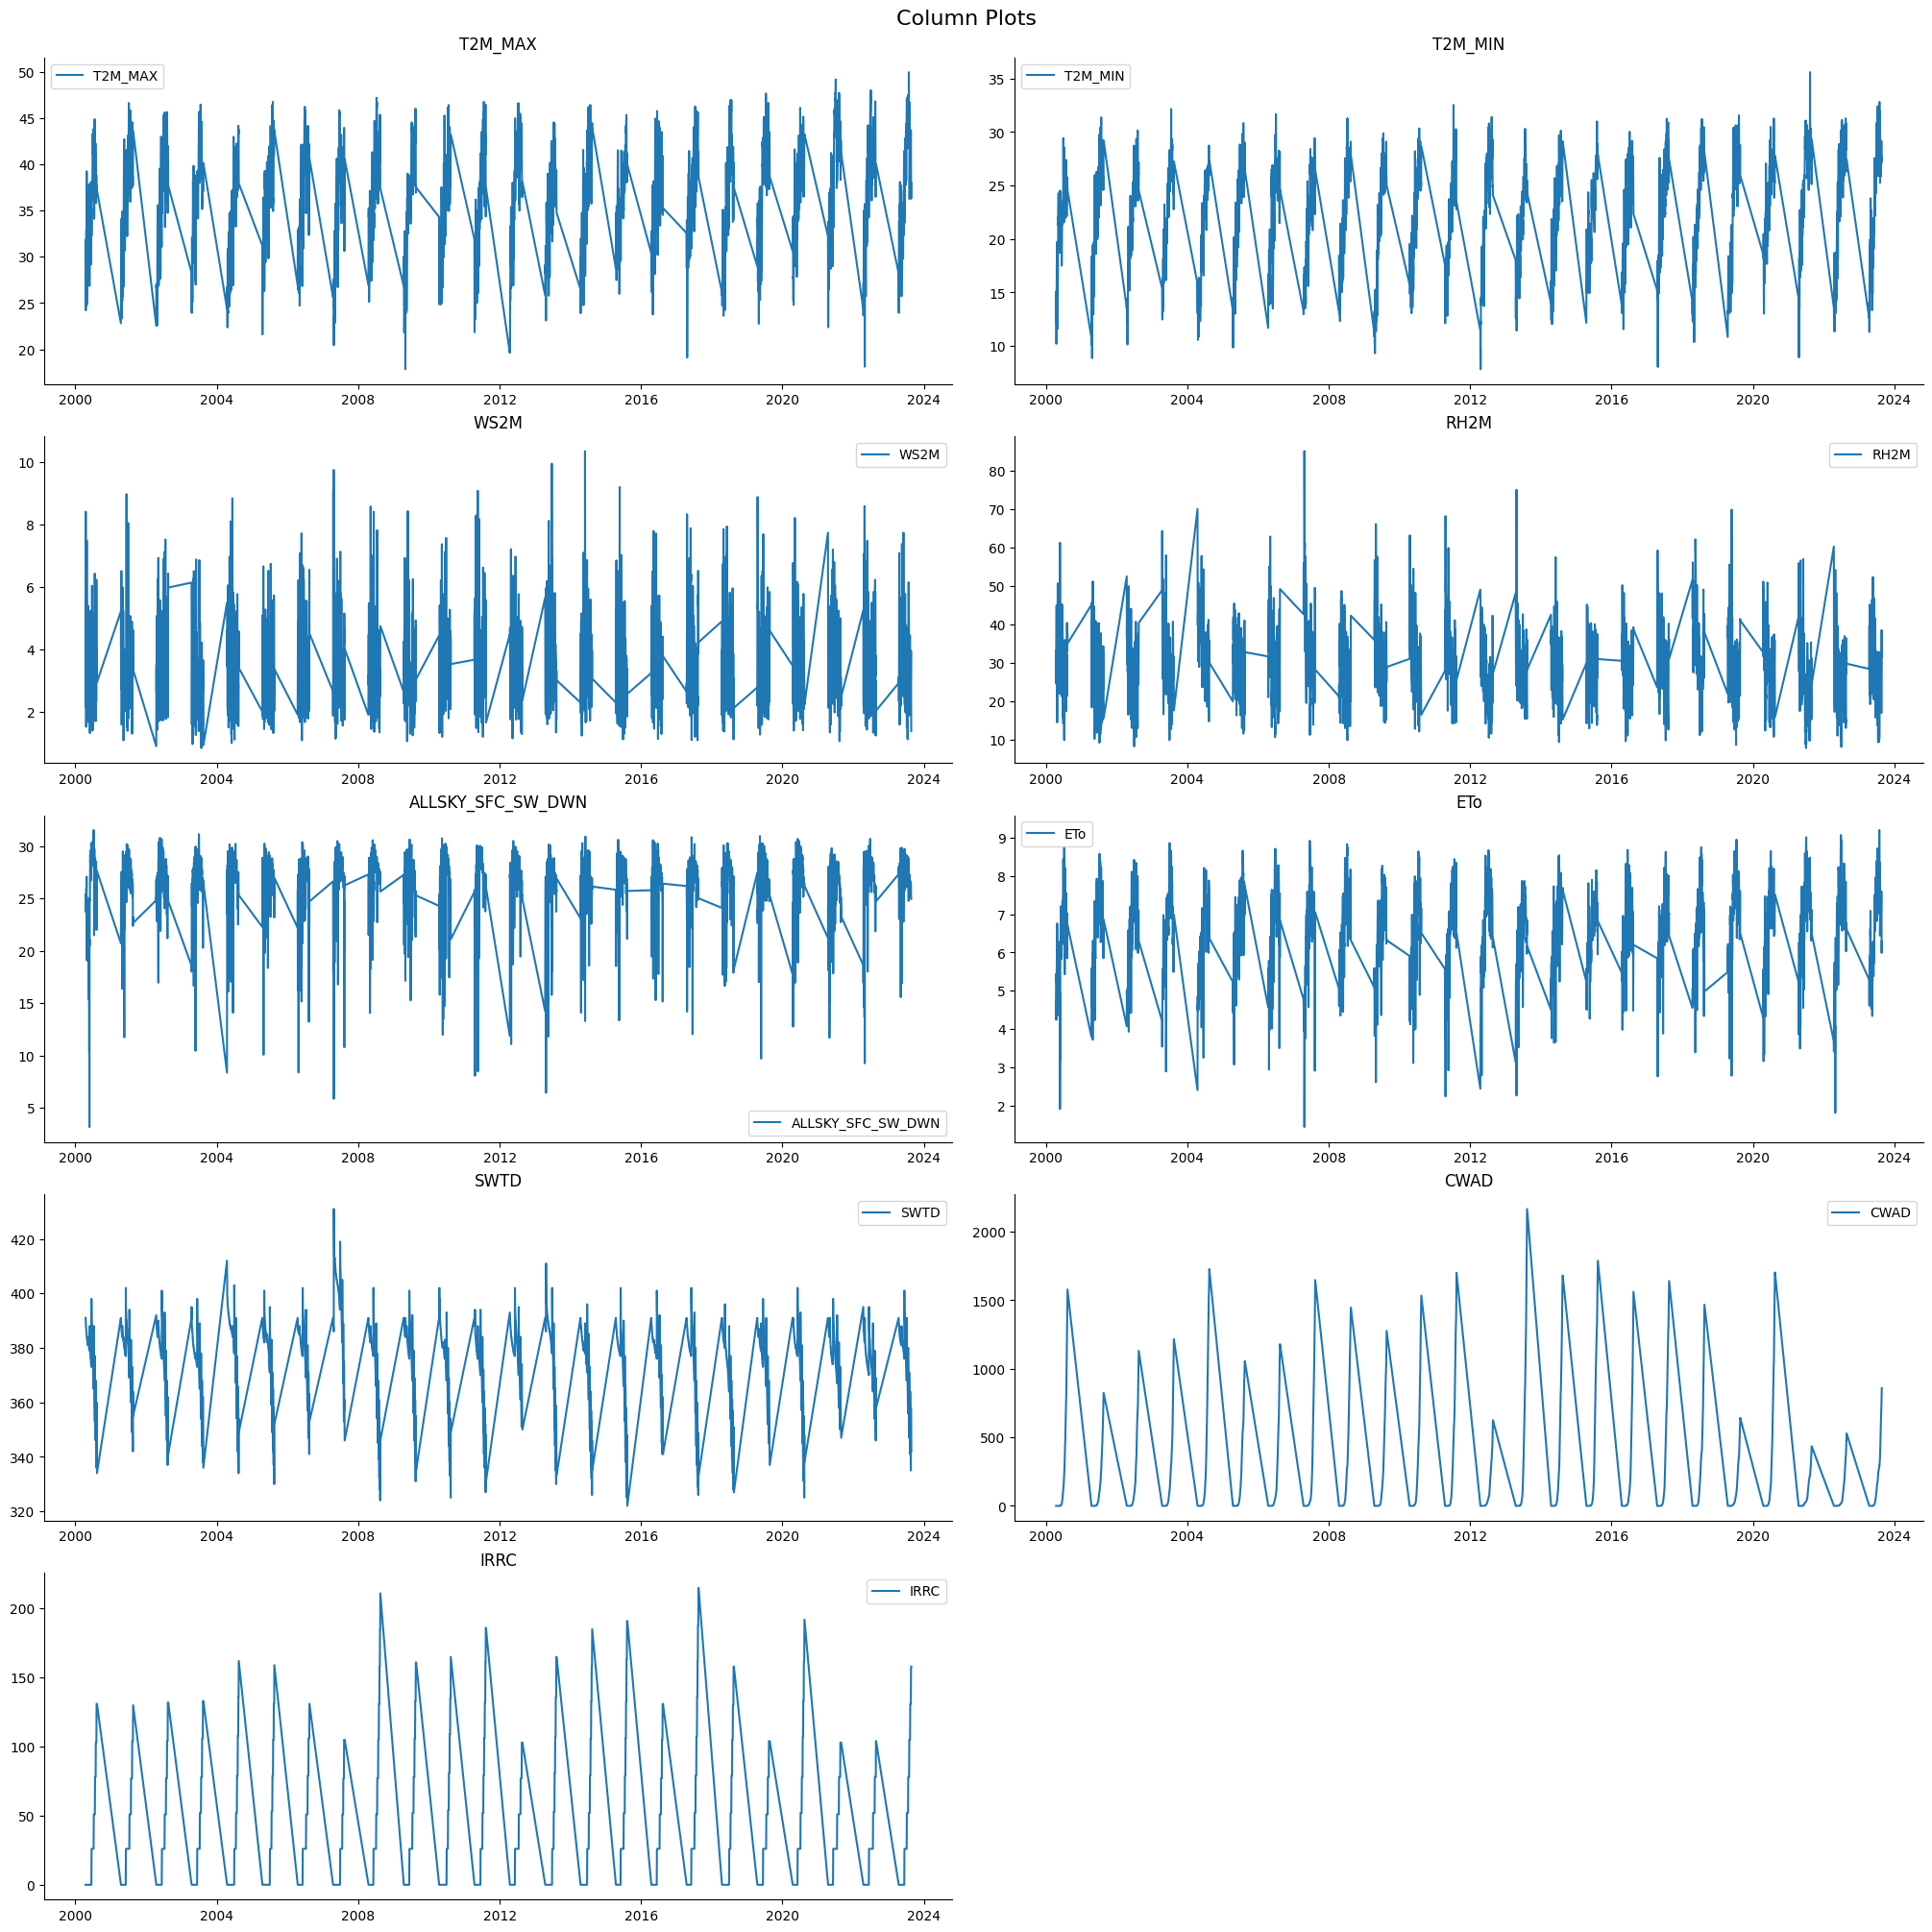

In [ ]:
# Example usage
columns_to_plot = ["T2M_MAX","T2M_MIN","WS2M","RH2M","ALLSKY_SFC_SW_DWN","ETo","SWTD","CWAD","IRRC"]

# Generate and display plots
plot_columns_together(output_data_df2, columns_to_plot,figsize=(20, 20))

In [ ]:
output_data_df2.to_csv('../data/output_data2.csv', index_label='date')